In [1]:
import json
import pandas as pd

with open('new_city_inspections.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

df = pd.DataFrame(data)

In [2]:
df = df.drop(['_id', 'certificate_number', 'date', 'address'], axis=1)

In [3]:
df

,id,business_name,result,sector
0,10021-2015-ENFO,ATLIXCO DELI GROCERY INC.,No Violation Issued,Cigarette Retail Dealer - 127
1,10057-2015-ENFO,LD BUSINESS SOLUTIONS,Violation Issued,Tax Preparers - 891
2,10084-2015-ENFO,MICHAEL GOMEZ RANGHALL,No Violation Issued,Locksmith - 062
3,1012-2015-CMPL,A&C CHIMNEY CORP.,Violation Issued,Home Improvement Contractor - 100
4,10127-2015-CMPL,ERIC CONSTRUCTION AND DECORATING INC.,Violation Issued,Home Improvement Contractor - 100
...,...,...,...,...
81042,5821-2016-ENFO,"SHARON, JOSEPH",Violation Issued,Stoop Line Stand - 033
81043,5543-2016-ENFO,TWO BROTHERS FASHION LTD,No Violation Issued,Misc Non-Food Retail - 817
81044,10192-2016-ENFO,"PIEROTTI, ESTEBAN A.",Violation Issued,Pedicab Business - 130
81045,4982-2016-ENFO,"SOHO GARDEN, INC.",No Violation Issued,Cigarette Retail Dealer - 127


In [4]:
from sklearn.preprocessing import LabelEncoder

new_df = df.copy()
for col in df:
    le = LabelEncoder()
    new_df[col] = le.fit_transform(df[col])

In [5]:
new_df

,id,business_name,result,sector
0,38,6219,12,12
1,87,24315,21,78
2,122,27811,12,48
3,168,3372,21,37
4,179,14544,21,37
...,...,...,...,...
81042,59989,37399,21,75
81043,56495,41349,12,52
81044,264,33031,21,59
81045,49473,38176,12,12


In [6]:
new_df.describe()

,id,business_name,result,sector
count,81047.000000,81047.000000,81047.000000,81047.000000
mean,40206.253779,21971.267783,13.928881,38.017262
std,23173.871032,13040.742706,3.781688,24.120959
min,0.000000,0.000000,0.000000,0.000000
25%,20135.500000,10806.000000,12.000000,12.000000
50%,40190.000000,21607.000000,12.000000,34.000000
75%,60332.500000,33663.500000,14.000000,59.000000
max,80147.000000,44444.000000,22.000000,85.000000


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(new_df)
scaled_data = scaler.transform(new_df)

In [8]:
scaled_data

array([[-1.73335312, -1.20793465, -0.51006131, -1.07862302],
       [-1.73123865,  0.17972494,  1.86984307,  1.65760343],
       [-1.72972832,  0.44780948, -0.51006131,  0.41386414],
       ...,
       [-1.72360069,  0.8480959 ,  1.86984307,  0.86990188],
       [ 0.39988155,  1.24263108, -0.51006131, -1.07862302],
       [ 0.10031818,  0.67295142, -0.51006131,  1.78197736]])

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

In [10]:
new_df.shape

(81047, 4)

In [11]:
x_pca.shape

(81047, 2)

In [12]:
pca.explained_variance_ratio_

array([0.27012191, 0.25367904])

Text(0, 0.5, 'Second principle component')

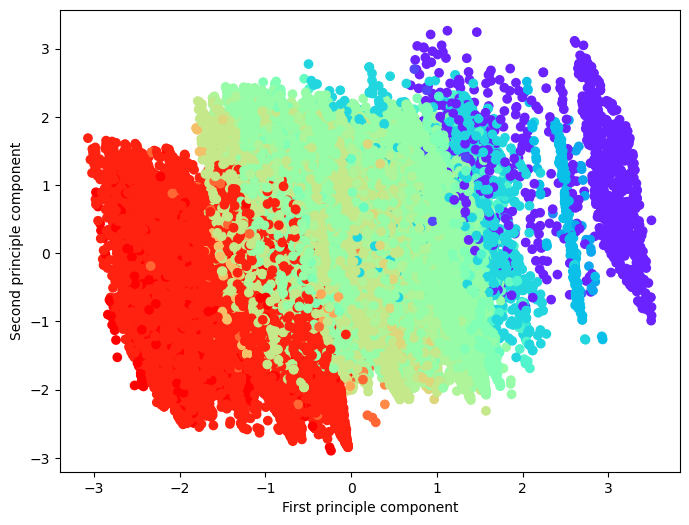

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=new_df['result'],cmap='rainbow')
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

In [14]:
!pip install kmodes

In [15]:
import numpy as np

from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
k_df = df.drop(['id', 'business_name'], axis=1)

In [17]:
k_df

,result,sector
0,No Violation Issued,Cigarette Retail Dealer - 127
1,Violation Issued,Tax Preparers - 891
2,No Violation Issued,Locksmith - 062
3,Violation Issued,Home Improvement Contractor - 100
4,Violation Issued,Home Improvement Contractor - 100
...,...,...
81042,Violation Issued,Stoop Line Stand - 033
81043,No Violation Issued,Misc Non-Food Retail - 817
81044,Violation Issued,Pedicab Business - 130
81045,No Violation Issued,Cigarette Retail Dealer - 127


In [18]:
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(k_df)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 101374.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 101374.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 101374.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 101374.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 101374.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2492, cost: 94232.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1043, cost: 87551.0
Init: initializing centroids
Init: initializing clusters
Startin

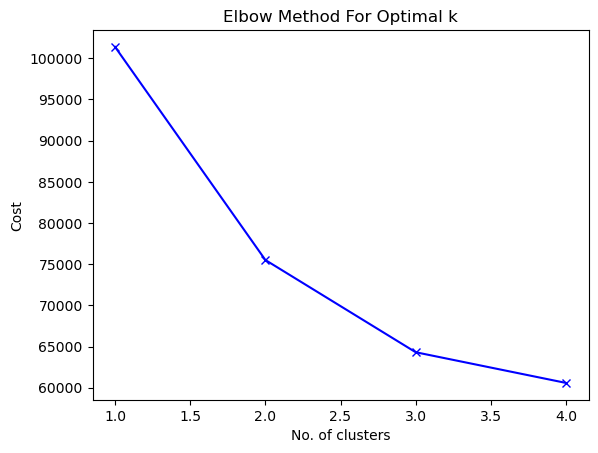

In [19]:
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [20]:
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(k_df)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 16058, cost: 74196.0
Run 1, iteration: 2/100, moves: 1218, cost: 74196.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 8814, cost: 72293.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 10691, cost: 74778.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 8736, cost: 64311.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 3408, cost: 65216.0
Best run was number 4


array([2, 0, 2, ..., 0, 2, 2], dtype=uint16)

In [21]:
k_df.insert(0, "Cluster", clusters, True)
k_df

,Cluster,result,sector
0,2,No Violation Issued,Cigarette Retail Dealer - 127
1,0,Violation Issued,Tax Preparers - 891
2,2,No Violation Issued,Locksmith - 062
3,0,Violation Issued,Home Improvement Contractor - 100
4,0,Violation Issued,Home Improvement Contractor - 100
...,...,...,...
81042,0,Violation Issued,Stoop Line Stand - 033
81043,2,No Violation Issued,Misc Non-Food Retail - 817
81044,0,Violation Issued,Pedicab Business - 130
81045,2,No Violation Issued,Cigarette Retail Dealer - 127


In [22]:
k_df[k_df['Cluster']==0].head(10)

,Cluster,result,sector
1,0,Violation Issued,Tax Preparers - 891
3,0,Violation Issued,Home Improvement Contractor - 100
4,0,Violation Issued,Home Improvement Contractor - 100
13,0,Violation Issued,Home Improvement Contractor - 100
14,0,Violation Issued,Home Improvement Contractor - 100
15,0,Fail,Fuel Oil Dealer - 814
18,0,Violation Issued,Home Improvement Contractor - 100
20,0,Violation Issued,Mobile Food Vendor - 881
21,0,Unable to Locate,Mobile Food Vendor - 881
23,0,Fail,Fuel Oil Dealer - 814


In [23]:
k_df[k_df['Cluster']==1].head(10)

,Cluster,result,sector
6,1,Pass,Tow Truck Company - 124
19,1,Pass,Fuel Oil Dealer - 814
27,1,Pass,Scale Dealer/Repairer - 107
32,1,Pass,Tow Truck Company - 124
33,1,Pass,Tow Truck Company - 124
34,1,Pass,Scale Dealer/Repairer - 107
45,1,Pass,Supermarket - 819
52,1,Pass,Grocery-Retail - 808
55,1,Pass,Sightseeing Bus - 078
62,1,Pass,Fuel Oil Dealer - 814


In [24]:
k_df[k_df['Cluster']==2].head(10)

,Cluster,result,sector
0,2,No Violation Issued,Cigarette Retail Dealer - 127
2,2,No Violation Issued,Locksmith - 062
5,2,No Violation Issued,Mobile Food Vendor - 881
7,2,No Violation Issued,Mobile Food Vendor - 881
8,2,No Violation Issued,Misc Non-Food Retail - 817
9,2,No Violation Issued,Salons And Barbershop - 841
10,2,No Violation Issued,Cigarette Retail Dealer - 127
11,2,No Violation Issued,Mobile Food Vendor - 881
12,2,No Violation Issued,Mobile Food Vendor - 881
16,2,No Violation Issued,Mobile Food Vendor - 881
